In [18]:
import pandas as pd
import numpy as np
import statistics, math
import matplotlib.pyplot as plt

In [19]:
#sample
x = [1.01, 0.99, 0.78, 1.12, 1.20, 0.86, 0.65, 0.56,
    0.87, 0.63, 0.7, 1.24, 1.4]

In [20]:
from sklearn.utils import resample

In [21]:
a = resample(x)

In [22]:
print(a)

[0.7, 0.65, 0.65, 1.4, 0.99, 0.7, 1.12, 1.24, 0.63, 0.78, 0.78, 0.63, 0.86]


In [41]:
q=[] #will hold the list of k values from 10 to 300 with step size of 1.
C1_mean = [] #will hold the arithmetic mean of confidence interval of harmonic means. Both C1_mean[], C2_mean[] will hold mean of C.I of harmonic mean.  
C2_mean = []
std1 = [] #will hold list of standard deviation for confidence interval c1, std2 will hold for confidence interval c2.
std2 = []
#As per question understanding, we are asked to get 95% C.I. for the harmonic mean for k=10,11,12,....,300. For each K, we will perform 20 iterations, and perform bootstrap resampling of given dataset.
#we are using the Floor and Ceiling function to get the upper and lower confidence interval. 
#we perform resampling as mentioned above and then we go on to sort the harmonics of resamples in ascending order.
for k in range(10,301,1):
    c1,c2=[],[]
    idx_c1 = math.ceil(0.025 *k)
    idx_c2 = math.floor((1-0.025)*k)
    for i in range (20):
        arr=[]
        for j in range(k):
            z= resample(x)
            v = round((statistics.harmonic_mean(z)), 4)
            arr.append(v)
        Output = sorted(arr, key = lambda x:float(x))               #sorting the harmonic means in ascending order.
        ci1,ci2 = Output[idx_c1],   Output[idx_c2]
        c1.append(ci1)
        c2.append(ci2)
    q.append(k)
    C1_mean.append(statistics.mean(c1))
    C2_mean.append(statistics.mean(c2))
    std1.append(statistics.stdev(c1))
    std2.append(statistics.stdev(c2))
#q
        

In [34]:
#C1_mean
g = statistics.stdev(Output)
g

0.062338796969309766

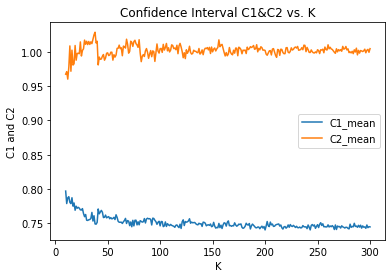

In [35]:
plt.plot(q, C1_mean, label="C1_mean")
plt.plot(q, C2_mean, label="C2_mean")
plt.title("Confidence Interval C1&C2 vs. K")
plt.xlabel("K")
plt.ylabel("C1 and C2")
plt.legend()
plt.show()

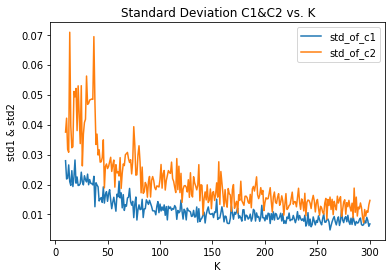

In [36]:
plt.plot(q,std1, label="std_of_c1")
plt.plot(q,std2, label="std_of_c2")
plt.title("Standard Deviation C1&C2 vs. K")
plt.xlabel("K")
plt.ylabel("std1 & std2")
plt.legend()
plt.show()

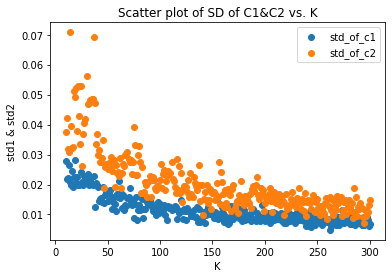

In [37]:
plt.scatter(q,std1,label="std_of_c1")
plt.scatter(q,std2,label="std_of_c2")
plt.title("Scatter plot of SD of C1&C2 vs. K")
plt.xlabel("K")
plt.ylabel("std1 & std2")
plt.legend()
plt.show()
plt.show()

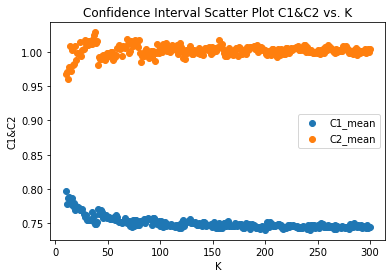

In [39]:
plt.scatter(q, C1_mean, label="C1_mean")
plt.scatter(q, C2_mean, label="C2_mean")
plt.title("Confidence Interval Scatter Plot C1&C2 vs. K")
plt.xlabel("K")
plt.ylabel("C1&C2")
plt.legend()
plt.show()
plt.show()

Concept Check Code. Used to understand the given problem and for loop implementation. 

In [40]:
#only for concept check. we used k=10 and did 20 iterations to get 200 random samples. 
for i in range(11):
    q = []
    for j in range(i):
        for k in range(20):
            z = resample(x)
            q.append(z)
#list(q)

In [32]:
z = []
for i in q:
    v = round((statistics.harmonic_mean(i)), 4)
    z.append(v)
#z

In [8]:
Output = sorted(z, key = lambda x:float(x))

In [9]:
print(Output)

[0.6843, 0.6994, 0.7118, 0.7248, 0.7318, 0.7423, 0.7444, 0.748, 0.7493, 0.7523, 0.7567, 0.7576, 0.7581, 0.7587, 0.7597, 0.7685, 0.7693, 0.7706, 0.7752, 0.7754, 0.7755, 0.7771, 0.7774, 0.7795, 0.7798, 0.7817, 0.7825, 0.7834, 0.7858, 0.788, 0.7898, 0.7906, 0.7939, 0.795, 0.795, 0.7971, 0.7994, 0.8001, 0.8004, 0.8008, 0.8009, 0.8013, 0.8016, 0.8027, 0.8036, 0.806, 0.8065, 0.8067, 0.807, 0.8093, 0.8098, 0.8103, 0.8109, 0.8116, 0.8119, 0.8134, 0.8135, 0.8137, 0.8138, 0.816, 0.8188, 0.8192, 0.8196, 0.82, 0.8211, 0.8215, 0.8218, 0.8221, 0.8225, 0.8227, 0.8231, 0.825, 0.8254, 0.8254, 0.826, 0.826, 0.8267, 0.8273, 0.8279, 0.8295, 0.8295, 0.8301, 0.8305, 0.8309, 0.8318, 0.8318, 0.8325, 0.8341, 0.8342, 0.8353, 0.837, 0.8371, 0.8373, 0.8375, 0.8378, 0.8392, 0.8402, 0.8415, 0.8417, 0.842, 0.8432, 0.8438, 0.8442, 0.8448, 0.8456, 0.8469, 0.8469, 0.8472, 0.8475, 0.8477, 0.8485, 0.8493, 0.85, 0.8513, 0.8524, 0.8524, 0.8526, 0.8554, 0.8554, 0.8579, 0.858, 0.8581, 0.8625, 0.8637, 0.8656, 0.8687, 0.8703, 

In [11]:
arith_mean = statistics.mean(Output)
arith_mean

0.853569

In [12]:
std = statistics.stdev(Output)
std

0.0671213679028201